## Predicting Churn With a Logistic Regression

Remember we have the following dataset:
### Input variables:
#### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
4 - education (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: "cellular","telephone") 

9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)     

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)    

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: "yes","no")


Let us begin by importing the librarues we will need

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm

As you saw in class before, let us import the dataset and rename the columns.

In [2]:
df = pd.read_csv(
    '../Data/bank-additional-full.csv',
    delimiter = ';',
    header = 0,
    decimal = '.',
    quotechar = '"')

df.columns = ['age', 'job', 'marital',
              'education', 'default', 'housing',
              'loan', 'contact', 'month', 'day_of_week',
              'duration', 'campaign_contact', 'previous_days',
              'previous_contacts', 'previous_outcome', 'employment_var_rate',
              'consumer_price_idx', 'consumer_confidence_idx ',
              'euribor_3m', 'nr_employed', 'campaign_success']

df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


### Target variable

As you saw in class the logistic model needs a target variable that is either 1 or 0. We will use the column campaign_success value yes as 1 and no as 0.

Text(0, 0.5, 'Count')

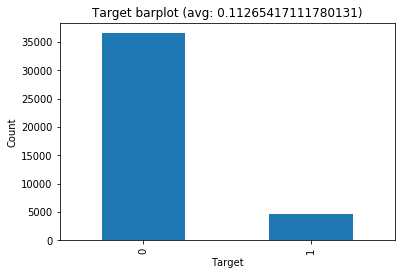

In [3]:
df['target'] = df['campaign_success'].replace(['no','yes'],[0,1])

ax = df['target'].value_counts().plot(
    kind = 'bar',
    title = 'Target barplot (avg: ' + str(df['target'].mean()) + ')')
ax.set_xlabel("Target")
ax.set_ylabel("Count")

### Numeric Independent Variables

The logistic regression requires numeric inputs, so for these variables we can immediately defelop a model. Consider predicting the target with independet variables age, duration, campaign_contact and previous_days plus an intercept. Let us call it model_1.

In [4]:
y = df['target']
x = df[['age', 'duration', 'campaign_contact', 'previous_days']]
x = sm.add_constant(x)
model_1 = sm.Logit(y, x).fit()
print(model_1.summary())
pred_1 = model_1.predict(x)

Optimization terminated successfully.
         Current function value: 0.258788
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41183
Method:                           MLE   Df Model:                            4
Date:                Sat, 16 Nov 2019   Pseudo R-squ.:                  0.2649
Time:                        10:32:14   Log-Likelihood:                -10659.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6433      0.093     -6.916      0.000      -0.826      -0.461
age        

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The library scikit-learn has wonderful tools for data science. Lets use some of those to get the true positive rate, false positive rate and area under the curve.

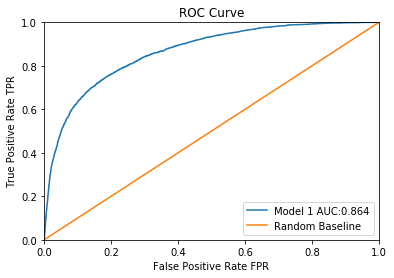

In [5]:
from sklearn.metrics import roc_curve, auc

fpr_1, tpr_1, _ = roc_curve(df['target'], pred_1)
auc_1 = auc(fpr_1, tpr_1)

plt.plot(fpr_1, tpr_1)
plt.plot([0,1], [0,1])
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Model 1 AUC:' + str(round(auc_1, 3)), 'Random Baseline'], loc='lower right')
plt.title('ROC Curve' )
plt.xlabel('False Positive Rate FPR' )
plt.ylabel('True Positive Rate TPR')
plt.show() 

As we have seen before the variable duration is suspicious. Lets remove it to make model_2 and compare the results.

In [6]:
y = df['target']
x = df[['age', 'campaign_contact', 'previous_days']]
x = sm.add_constant(x)
model_2 = sm.Logit(y, x).fit()
print(model_2.summary())
pred_2 = model_2.predict(x)

fpr_2, tpr_2, _ = roc_curve(df['target'], pred_2)
auc_2 = auc(fpr_2, tpr_2)

Optimization terminated successfully.
         Current function value: 0.319101
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41184
Method:                           MLE   Df Model:                            3
Date:                Sat, 16 Nov 2019   Pseudo R-squ.:                 0.09354
Time:                        10:34:39   Log-Likelihood:                -13143.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5182      0.084      6.141      0.000       0.353       0.684
age        

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


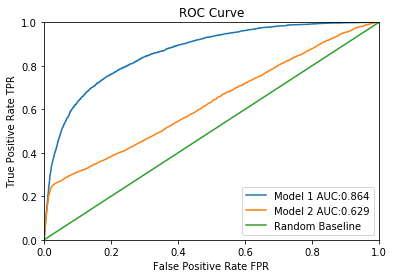

In [7]:
plt.plot(fpr_1, tpr_1)
plt.plot(fpr_2, tpr_2)
plt.plot([0,1], [0,1])
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Model 1 AUC:' + str(round(auc_1, 3)),
            'Model 2 AUC:' + str(round(auc_2, 3)),
            'Random Baseline'], loc='lower right')
plt.title('ROC Curve' )
plt.xlabel('False Positive Rate FPR' )
plt.ylabel('True Positive Rate TPR')
plt.show() 

The performance dropped quite a bit for higher thresholds.

### Categorical Independent Variables

We need to convert categorical variables into numeric before we can use them as model inputs. The most common way to do this is to create dummy variables, which take value 1 if the categories are in a certain list or zero if not. Let us consider education.

                         mean  count
education                           
basic.4y             0.102490   4176
basic.6y             0.082024   2292
basic.9y             0.078246   6045
high.school          0.108355   9515
illiterate           0.222222     18
professional.course  0.113485   5243
university.degree    0.137245  12168
unknown              0.145003   1731


Text(0, 0.5, 'Probability of success')

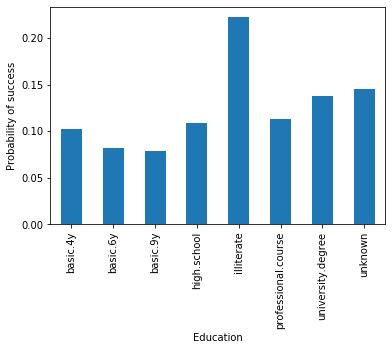

In [8]:
print(df.groupby('education')['target'].agg(['mean','count']))
ax = df.groupby('education')['target'].mean().plot(kind = 'bar')
ax.set_xlabel("Education")
ax.set_ylabel("Probability of success")

It seems the clients with less time in the education system tend to be less prone to subscribe a depoisit.

                     mean  count
dummy_education                 
0                0.131439  19142
1                0.096344  22046


Text(0, 0.5, 'Probability of success')

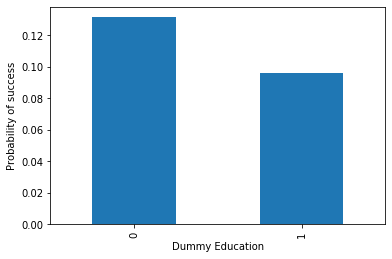

In [8]:
df['dummy_education'] = np.where(df['education'].isin(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate']), 1, 0)


print(df.groupby('dummy_education')['target'].agg(['mean','count']))
ax = df.groupby('dummy_education')['target'].mean().plot(kind = 'bar')
ax.set_xlabel("Dummy Education")
ax.set_ylabel("Probability of success")

In [9]:
y = df['target']
x = df[['age', 'duration',  'campaign_contact', 'previous_days', 'dummy_education']]
x = sm.add_constant(x)
model_3 = sm.Logit(y, x).fit()
print(model_3.summary())
pred_3 = model_3.predict(x)

fpr_3, tpr_3, _ = roc_curve(df['target'], pred_3)
auc_3 = auc(fpr_3, tpr_3)

Optimization terminated successfully.
         Current function value: 0.257185
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41182
Method:                           MLE   Df Model:                            5
Date:                Sat, 16 Nov 2019   Pseudo R-squ.:                  0.2694
Time:                        10:42:15   Log-Likelihood:                -10593.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5041      0.094     -5.355      0.000      -0.689      -0.320
age        

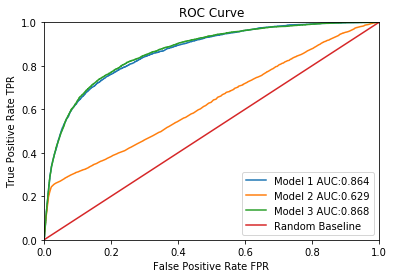

In [10]:
plt.plot(fpr_1, tpr_1)
plt.plot(fpr_2, tpr_2)
plt.plot(fpr_3, tpr_3)
plt.plot([0,1], [0,1])
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Model 1 AUC:' + str(round(auc_1, 3)),
            'Model 2 AUC:' + str(round(auc_2, 3)),
            'Model 3 AUC:' + str(round(auc_3, 3)),
            'Random Baseline'], loc='lower right')
plt.title('ROC Curve' )
plt.xlabel('False Positive Rate FPR' )
plt.ylabel('True Positive Rate TPR')
plt.show() 

Can you repeat the procedure to create new dummy variables for the marital status and for contacts?

What impact do these have in the ROC Curve and AUC metric?